$y(n + 1) = y(n) -by(n) + \cfrac{cy(n-\tau)}{1+ y^{10} (n- \tau)}$, which is only defined for $n >= 18$


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor

In [80]:
y_list = [0.9697, 0.9699, 0.9794, 1.0003, 1.0319, 1.0703, 1.1076, 1.1352, 1.1485, 1.1482, 1.1383, 1.1234, 1.1072, 1.0928, 1.0820, 1.0756, 1.0739, 1.0759]

In [81]:
def MackayGlass(y, N):
    b = 0.1
    c = 0.2
    tau = 17
    for n in range(17, N):
        y = np.append(y, (y[n] - b*y[n] + (c*y[n-tau]/(1 + ((y[n-tau])**10)))))
        
    return(y)

In [82]:
Y_from_list = MackayGlass(y_list, 999)

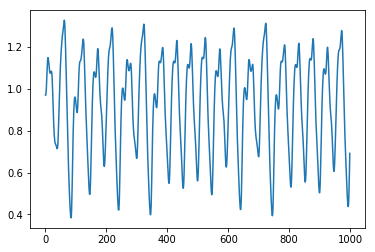

In [83]:
plt.plot(range(1000),Y_from_list)
plt.show()

In [84]:
Y_train =  Y[0:500]
Y_test = Y[500:1000]
print(Y_train.shape)
print(Y_test.shape)

(500,)
(500,)


In [85]:
#the serie is recursively defined. We are going to try to predict the next value after the end of X_train. This value is in Y_test[0]
X_train = np.arange(0, 500, 1).reshape(-1, 1)
X_test = np.arange(500, 1000, 1).reshape(-1, 1)

print(X_train.shape)
print(X_test.shape)

(500, 1)
(500, 1)


Plot of just the generated training and test data

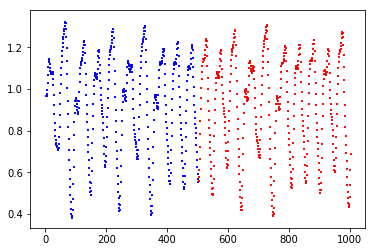

In [86]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_train, Y_train, s=1, c='b', marker="s", label='training')
ax1.scatter(X_test, Y_test, s=1, c='r', marker="s", label='testing')
plt.show()

In [87]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)

### Predict next 500 values using MPLRegressor

In [103]:
#Now the model is tuned we can train the regressor on the 500 training values


MLP01 = MLPRegressor(
   hidden_layer_sizes=(2,3,1), activation='relu', solver='lbfgs', alpha=0.0001, batch_size=141,
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=1, tol=0.00001, verbose=False, warm_start=True, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.960, beta_2=0.9969, epsilon=1e-9)

MLP_model01 = MLP01.fit(X_train, Y_train)

pred_y = MLP_model01.predict(X_test)

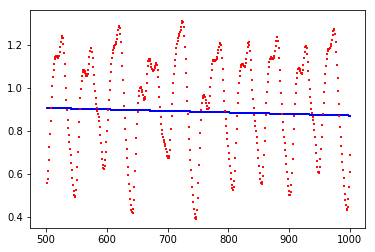

In [104]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_test, pred_y, s=1, c='b', marker="s", label='prediction')
ax1.scatter(X_test, Y_test, s=1, c='r', marker="s", label='testing')
plt.show()